In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram

In [4]:
np.random.seed(12345)
clase1 = np.random.normal(loc=1,scale=0.2,size=(4,2))
clase2 = np.random.normal(loc=2,scale=0.2,size=(4,2))
clase3 = np.random.normal(loc=3,scale=0.2,size=(4,2))
#------------------------------------------------------
A = [5.5,3.2,4.4,2.1]
B = [4.2,4,2.1,3.5]
C = [5.5,3.4,4.1,2.2]
D = [5,4,3,2]

In [5]:
apilado = np.vstack((clase1,clase2,clase3))
ejemplo = np.vstack((A,B,C,D))

In [20]:
x =  apilado[:,0]
y =  apilado[:,1]

(4,)
(4,)


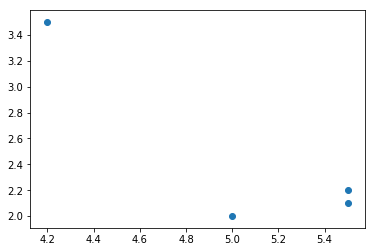

In [20]:
print(ejemplo[:,0].shape)
print(ejemplo[:,1].shape)
plt.scatter(x=ejemplo[:,0],y=ejemplo[:,3])

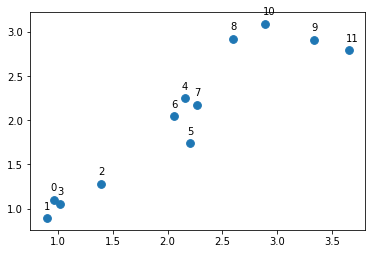

In [22]:
plt.scatter(x,y,s=60)
for i in range(12):
    plt.text(x[i]-0.025,y[i]+0.1,i)

In [22]:
df = pd.DataFrame(apilado,columns=['x','y'])
example = pd.DataFrame(ejemplo,columns=['A','B','C','D'])
example

,A,B,C,D
0,5.5,3.2,4.4,2.1
1,4.2,4.0,2.1,3.5
2,5.5,3.4,4.1,2.2
3,5.0,4.0,3.0,2.0


In [23]:
dm = pdist(df,metric='euclidean')
dist_example = pdist(example,metric='euclidean')
dist_example.shape

(6,)

In [33]:
z = linkage(dm,method='complete')
z_example = linkage(dist_example,method='complete')
z_example.shape

(3, 4)

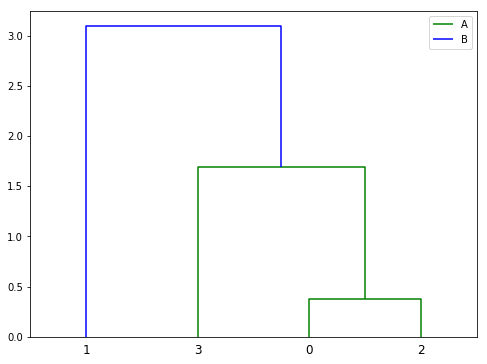

In [34]:
fig_ex = plt.gcf()
fig_ex.set_size_inches(8,6)
fig_ex.savefig('../../../../Downloads/MCC/Reconocimiento de patrones/fig')
dendrogram(z_example)
plt.legend(['A','B','C','D'])

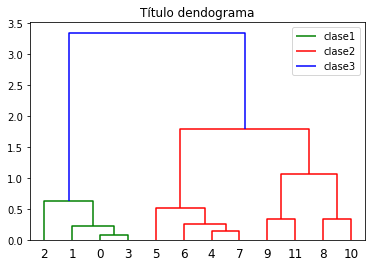

In [37]:
dendrogram(z)#argumento orientation='right'
plt.title('Título dendograma')
plt.legend(['clase1','clase2','clase3'])

In [38]:
#las distancias también se pueden representar en forma de matriz cuadrada
#para eso es la funcion importada squareform
matriz_dist = squareform(dm)
matriz_dist.shape

(12, 12)

In [41]:
#matriz simétrica, la distancia es 0 con el mismo
pd.DataFrame(matriz_dist)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.216297,0.471052,0.071404,1.660716,1.399818,1.450370,1.699922,2.457629,2.989830,2.781168,3.182752
1,0.216297,0.000000,0.631679,0.207493,1.852719,1.558721,1.637529,1.883939,2.655293,3.168063,2.975333,3.349478
2,0.471052,0.631679,0.000000,0.435589,1.233151,0.931038,1.013153,1.255934,2.041599,2.536687,2.355238,2.719173
3,0.071404,0.207493,0.435589,0.000000,1.646764,1.366587,1.432878,1.680478,2.448278,2.967282,2.769044,3.154169
4,1.660716,1.852719,1.233151,1.646764,0.000000,0.510757,0.226223,0.137191,0.810087,1.353503,1.122903,1.592669
5,1.399818,1.558721,0.931038,1.366587,0.510757,0.000000,0.338358,0.441972,1.250009,1.629337,1.520526,1.791855
6,1.450370,1.637529,1.013153,1.432878,0.226223,0.338358,0.000000,0.252527,1.034797,1.544725,1.342516,1.762332
7,1.699922,1.883939,1.255934,1.680478,0.137191,0.441972,0.252527,0.000000,0.817509,1.292542,1.108671,1.511526
8,2.457629,2.655293,2.041599,2.448278,0.810087,1.250009,1.034797,0.817509,0.000000,0.734254,0.338092,1.058117
9,2.989830,3.168063,2.536687,2.967282,1.353503,1.629337,1.544725,1.292542,0.734254,0.000000,0.478200,0.336787


# probando tips de PCA del libro Python machine learning

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df_wine = pd.read_csv('../datasets/wine-dataset/wine.csv',header=None)

In [7]:
#obtener X e Y en una sola linea
X,y = df_wine.iloc[:,1:],df_wine.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
sc = StandardScaler()

In [13]:
#estandarizando X
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## obteniedo eigenpairs de la matriz de covarianza

In [20]:
cov_mat = np.cov(X_train_std.T)
#obteniendo los eigenpairs
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
#print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [22]:
#basados en los top  eigvecs, mostramos los mas informativos con una explicacion de varianzas
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

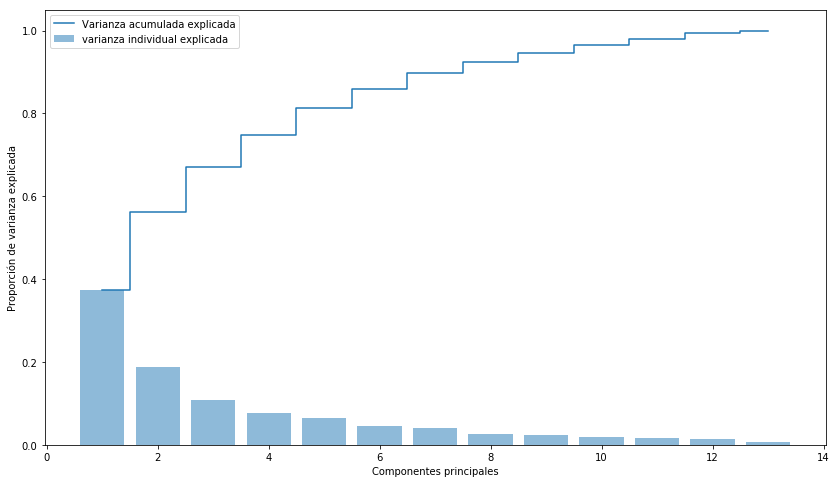

In [29]:
fig= plt.gcf()
#guardar fig en una ruta
#fig.savefig('test2png.png', dpi=100)
fig.set_size_inches(14,8)
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='varianza individual explicada')
plt.step(range(1,14),cum_var_exp,where='mid',label='Varianza acumulada explicada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best') #buen truco para poner los legends
plt.show()

In [30]:
eigen_pairs = [(np.abs(eigen_vals[i]) for i in range(len(eigen_vals)))]
eigen_pairs.sort(reverse=True)

In [33]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))

TypeError: 'generator' object is not subscriptable

# Probando matriz distancia

In [34]:
iris_ds = pd.read_csv('../datasets/iris_plant/iris_plant.csv')

In [36]:
X,y = iris_ds[["sepal.length","sepal.width","petal.length","petal.width"]],iris_ds[["variety"]]

In [42]:
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage

In [39]:
row_dist = pd.DataFrame( squareform( pdist( X,metric='euclidean' ) ) )

In [43]:
row_cluster = linkage(X.values,method='complete',metric='euclidean')

In [45]:
pd.DataFrame( row_cluster,columns=['row label 1','row label 2','distance','no. of items in clust'],
             index=['cluster %d' %(i+1) for i in range( row_cluster.shape[0] )] )

,row label 1,row label 2,distance,no. of items in clust
cluster 1,101.0,142.0,0.000000,2.0
cluster 2,7.0,39.0,0.100000,2.0
cluster 3,0.0,17.0,0.100000,2.0
cluster 4,9.0,34.0,0.100000,2.0
cluster 5,128.0,132.0,0.100000,2.0
cluster 6,10.0,48.0,0.100000,2.0
cluster 7,4.0,37.0,0.141421,2.0
cluster 8,19.0,21.0,0.141421,2.0
cluster 9,29.0,30.0,0.141421,2.0
cluster 10,57.0,93.0,0.141421,2.0


# visualizando dendograma

In [46]:
from scipy.cluster.hierarchy import dendrogram

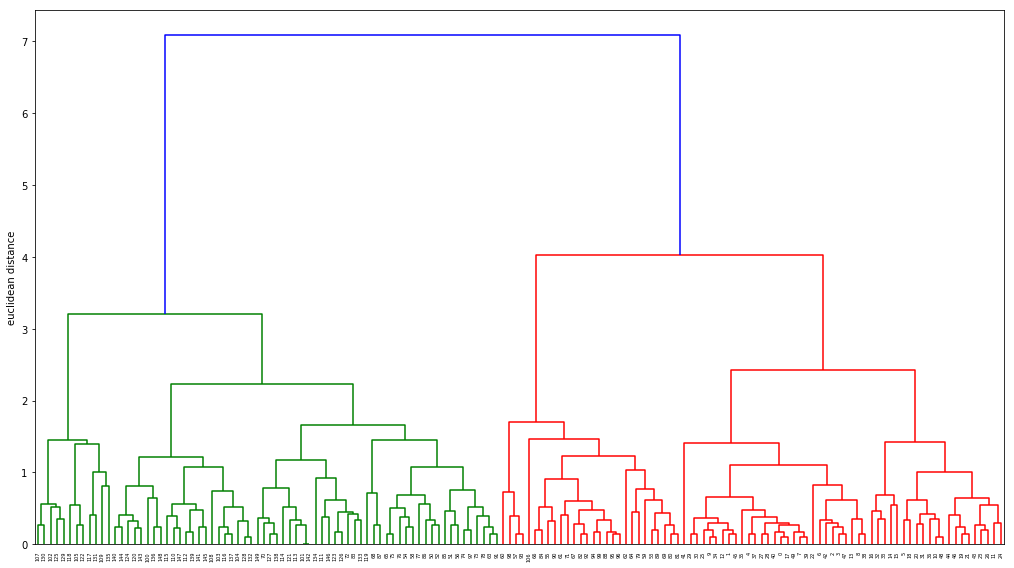

In [51]:
fig_2 = plt.gcf()
fig_2.set_size_inches(14,8)
row_dendr = dendrogram( row_cluster )
plt.tight_layout()
plt.ylabel('euclidean distance')
plt.show()